# Introduction 
kaggle Dataset link: https://www.kaggle.com/datasets/ahmedmohamed2003/retail-store-sales-dirty-for-data-cleaning

# Question 


1) What are the top 5 best-selling items?

2) Which payment methods are most used per location (In-store vs Online)?

3) What is the distribution of sales per day, week, and month?

4) Which customers are the most valuable (highest total spending)?

5) Are there any trends in discount usage over time or across categories?

6) What is the average transaction value per category?

7) Which item categories are more popular in online vs. in-store transactions?

8) Are discounts more likely to be applied on certain days (weekends, end of month, year)?

9) Do some customers always shop online while others prefer in-store?

10) What are the top 5 profit-gaining items?

11) What time of year sees the highest number of transactions or revenue?

12) Which categories are not purchased well (have low sales)?

13) What are the bottom 5 least sold items?

14) Are there product categories that are commonly bought together?

15) Which customers have the highest total spending and how frequently do they shop?

16) What is the ratio of new customers to returning customers?


# Import Library


In [40]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.impute import KNNImputer

# Load the Data


In [41]:
df=pd.read_csv('retail_store_sales.csv')
df

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,4/8/2024,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,7/23/2023,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,10/5/2022,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,5/7/2022,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,10/2/2022,False
...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,9/3/2023,NaN
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,8/12/2022,False
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,8/24/2024,NaN
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,12/30/2023,True


# Data Exploration

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [43]:
df.duplicated().sum()

0

# Data Cleaning / Preprocessing

#### Fixing Transaction ID

In [44]:
df['Transaction ID'].unique()

array(['TXN_6867343', 'TXN_3731986', 'TXN_9303719', ..., 'TXN_5306010',
       'TXN_5167298', 'TXN_2407494'], dtype=object)

In [45]:
for Transaction in df['Transaction ID'].unique():
    print(Transaction)

TXN_6867343
TXN_3731986
TXN_9303719
TXN_9458126
TXN_4575373
TXN_7482416
TXN_3652209
TXN_1372952
TXN_9728486
TXN_2722661
TXN_8776416
TXN_5422631
TXN_5874772
TXN_4413070
TXN_2490363
TXN_1809665
TXN_7563311
TXN_9634894
TXN_4396807
TXN_4206593
TXN_9939063
TXN_8685338
TXN_6547964
TXN_3314099
TXN_9980736
TXN_3481599
TXN_9057609
TXN_1599706
TXN_1598860
TXN_7138501
TXN_5444504
TXN_4353295
TXN_1543244
TXN_1494700
TXN_1621497
TXN_6398436
TXN_9065245
TXN_6963438
TXN_8312797
TXN_5836005
TXN_4223250
TXN_1019817
TXN_1110407
TXN_6276518
TXN_4740738
TXN_9587232
TXN_6404316
TXN_9331642
TXN_9729422
TXN_8425168
TXN_5379241
TXN_8413369
TXN_4836321
TXN_9451794
TXN_8218431
TXN_2383377
TXN_7909783
TXN_5046007
TXN_6966182
TXN_3424571
TXN_6820452
TXN_1998771
TXN_1132097
TXN_5418871
TXN_6952276
TXN_6340470
TXN_5885894
TXN_3671271
TXN_2719047
TXN_9908330
TXN_2016332
TXN_7363165
TXN_1260450
TXN_6315447
TXN_5973228
TXN_2780662
TXN_1142481
TXN_3933685
TXN_8955685
TXN_1061030
TXN_7821493
TXN_8114453
TXN_8024803
TXN_

In [46]:
# Check for duplicate transaction IDs
duplicates = df['Transaction ID'].duplicated().sum()
print(f"Number of duplicate Transaction IDs: {duplicates}")

Number of duplicate Transaction IDs: 0


In [47]:
# Check for missing transaction IDs
missing_ids = df['Transaction ID'].isnull().sum()
print(f"Missing Transaction IDs: {missing_ids}")

Missing Transaction IDs: 0


In [48]:
df

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,4/8/2024,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,7/23/2023,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,10/5/2022,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,5/7/2022,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,10/2/2022,False
...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,9/3/2023,NaN
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,8/12/2022,False
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,8/24/2024,NaN
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,12/30/2023,True


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


#### Fixing Customer ID

In [50]:
df['Customer ID'].unique()

array(['CUST_09', 'CUST_22', 'CUST_02', 'CUST_06', 'CUST_05', 'CUST_07',
       'CUST_21', 'CUST_23', 'CUST_25', 'CUST_14', 'CUST_15', 'CUST_17',
       'CUST_01', 'CUST_10', 'CUST_04', 'CUST_13', 'CUST_18', 'CUST_08',
       'CUST_20', 'CUST_12', 'CUST_11', 'CUST_19', 'CUST_16', 'CUST_24',
       'CUST_03'], dtype=object)

In [51]:
for Customer in df['Customer ID'].unique():
    print(Customer)

CUST_09
CUST_22
CUST_02
CUST_06
CUST_05
CUST_07
CUST_21
CUST_23
CUST_25
CUST_14
CUST_15
CUST_17
CUST_01
CUST_10
CUST_04
CUST_13
CUST_18
CUST_08
CUST_20
CUST_12
CUST_11
CUST_19
CUST_16
CUST_24
CUST_03


#### Fixing Category

In [52]:
df['Category'].unique()

array(['Patisserie', 'Milk Products', 'Butchers', 'Beverages', 'Food',
       'Furniture', 'Electric household essentials',
       'Computers and electric accessories'], dtype=object)

In [53]:
for cg in df['Category'].unique():
    print(cg)

Patisserie
Milk Products
Butchers
Beverages
Food
Furniture
Electric household essentials
Computers and electric accessories


In [54]:
# Strip spaces and capitalize properly
df['Category'] = df['Category'].astype(str).str.strip().str.title()

In [55]:
print(df['Category'].value_counts(dropna=False))

Category
Furniture                             1591
Electric Household Essentials         1591
Food                                  1588
Milk Products                         1584
Butchers                              1568
Beverages                             1567
Computers And Electric Accessories    1558
Patisserie                            1528
Name: count, dtype: int64


In [56]:
df

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,4/8/2024,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,7/23/2023,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,10/5/2022,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,5/7/2022,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,10/2/2022,False
...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,9/3/2023,NaN
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,8/12/2022,False
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,8/24/2024,NaN
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,12/30/2023,True


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [58]:
df['Item'].unique()

array(['Item_10_PAT', 'Item_17_MILK', 'Item_12_BUT', 'Item_16_BEV',
       'Item_6_FOOD', nan, 'Item_1_FOOD', 'Item_16_FUR', 'Item_22_BUT',
       'Item_3_BUT', 'Item_2_FOOD', 'Item_24_PAT', 'Item_16_MILK',
       'Item_17_PAT', 'Item_13_EHE', 'Item_7_BEV', 'Item_4_EHE',
       'Item_10_FOOD', 'Item_14_FUR', 'Item_20_BUT', 'Item_25_FUR',
       'Item_14_FOOD', 'Item_22_PAT', 'Item_11_FOOD', 'Item_6_PAT',
       'Item_21_EHE', 'Item_25_BEV', 'Item_23_FOOD', 'Item_10_FUR',
       'Item_11_BEV', 'Item_23_BUT', 'Item_22_BEV', 'Item_10_EHE',
       'Item_24_BUT', 'Item_8_BEV', 'Item_3_FOOD', 'Item_12_FOOD',
       'Item_16_CEA', 'Item_11_PAT', 'Item_16_BUT', 'Item_5_CEA',
       'Item_19_MILK', 'Item_23_FUR', 'Item_7_FUR', 'Item_15_CEA',
       'Item_6_MILK', 'Item_24_CEA', 'Item_22_CEA', 'Item_22_FOOD',
       'Item_2_BUT', 'Item_14_PAT', 'Item_12_PAT', 'Item_18_FOOD',
       'Item_1_PAT', 'Item_4_BEV', 'Item_22_FUR', 'Item_7_PAT',
       'Item_20_CEA', 'Item_20_FOOD', 'Item_11_FUR', 'Item

In [59]:
for it in df['Item'].unique():
    print(it)

Item_10_PAT
Item_17_MILK
Item_12_BUT
Item_16_BEV
Item_6_FOOD
nan
Item_1_FOOD
Item_16_FUR
Item_22_BUT
Item_3_BUT
Item_2_FOOD
Item_24_PAT
Item_16_MILK
Item_17_PAT
Item_13_EHE
Item_7_BEV
Item_4_EHE
Item_10_FOOD
Item_14_FUR
Item_20_BUT
Item_25_FUR
Item_14_FOOD
Item_22_PAT
Item_11_FOOD
Item_6_PAT
Item_21_EHE
Item_25_BEV
Item_23_FOOD
Item_10_FUR
Item_11_BEV
Item_23_BUT
Item_22_BEV
Item_10_EHE
Item_24_BUT
Item_8_BEV
Item_3_FOOD
Item_12_FOOD
Item_16_CEA
Item_11_PAT
Item_16_BUT
Item_5_CEA
Item_19_MILK
Item_23_FUR
Item_7_FUR
Item_15_CEA
Item_6_MILK
Item_24_CEA
Item_22_CEA
Item_22_FOOD
Item_2_BUT
Item_14_PAT
Item_12_PAT
Item_18_FOOD
Item_1_PAT
Item_4_BEV
Item_22_FUR
Item_7_PAT
Item_20_CEA
Item_20_FOOD
Item_11_FUR
Item_25_PAT
Item_7_FOOD
Item_21_FUR
Item_24_FUR
Item_8_MILK
Item_4_FOOD
Item_14_BEV
Item_4_PAT
Item_4_MILK
Item_7_CEA
Item_6_EHE
Item_21_BUT
Item_16_PAT
Item_25_CEA
Item_8_BUT
Item_10_CEA
Item_5_FUR
Item_9_FOOD
Item_21_CEA
Item_8_CEA
Item_8_EHE
Item_23_MILK
Item_23_BEV
Item_19_BEV
Item_2

In [60]:
#Missing Values
df.isna().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

In [61]:
# Step 1: Standardize 'Item' values and replace missing markers
df['Item'] = df['Item'].replace(['None', '', 'NA', 'N/A', 'null'], pd.NA)

# Step 2: Fill missing values in 'Item' using the most frequent item per Category
df['Item'] = df.groupby('Category')['Item'].transform(
    lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x.fillna('UNKNOWN_ITEM')
)

In [62]:
#Missing Values
df.isna().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                   0
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              12575 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


#### Fixing Price Per Unit

In [64]:
df['Price Per Unit'].unique()

array([18.5, 29. , 21.5, 27.5, 12.5,  nan,  5. , 33.5, 36.5,  8. ,  6.5,
       39.5, 24.5, 23. , 35. , 14. ,  9.5, 41. , 20. , 38. , 15.5, 11. ,
       32. , 26. , 30.5, 17. ])

In [65]:
for P in df['Price Per Unit'].unique():
    print(P)

18.5
29.0
21.5
27.5
12.5
nan
5.0
33.5
36.5
8.0
6.5
39.5
24.5
23.0
35.0
14.0
9.5
41.0
20.0
38.0
15.5
11.0
32.0
26.0
30.5
17.0


In [66]:
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')

In [67]:
median_price = df['Price Per Unit'].median()
df['Price Per Unit'] = df['Price Per Unit'].fillna(median_price)

In [68]:
df['Price Per Unit'].isna().sum()

0

In [69]:
df

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,4/8/2024,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,7/23/2023,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,10/5/2022,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,5/7/2022,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,10/2/2022,False
...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,9/3/2023,NaN
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,8/12/2022,False
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,8/24/2024,NaN
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,12/30/2023,True


In [70]:
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce').astype(float)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              12575 non-null  object 
 4   Price Per Unit    12575 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [72]:
df['Price Per Unit'].describe()

count    12575.000000
mean        23.348191
std         10.480413
min          5.000000
25%         14.000000
50%         23.000000
75%         32.000000
max         41.000000
Name: Price Per Unit, dtype: float64

#### Fixing Quantity

In [73]:
df['Quantity'].unique()

array([10.,  9.,  2.,  7.,  8., nan,  1.,  3.,  6.,  4.,  5.])

In [74]:
for Qty in df['Quantity'].unique():
    print(Qty)

10.0
9.0
2.0
7.0
8.0
nan
1.0
3.0
6.0
4.0
5.0


In [75]:
df.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                   0
Price Per Unit         0
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

In [76]:
# Convert categorical features to numeric
df['Category_encoded'] = pd.factorize(df['Category'])[0]
df['Item_encoded'] = pd.factorize(df['Item'])[0]
features_for_knn = df[['Quantity', 'Price Per Unit', 'Category_encoded', 'Item_encoded']]

imputer = KNNImputer(n_neighbors=5)
features_imputed = imputer.fit_transform(features_for_knn)

df['Quantity'] = features_imputed[:, 0]

In [77]:
df['Quantity'].isna().sum()

0

In [78]:
df['Quantity'] = df['Quantity'].astype(int)

In [79]:
df

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Category_encoded,Item_encoded
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10,185.0,Digital Wallet,Online,4/8/2024,True,0,0
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9,261.0,Digital Wallet,Online,7/23/2023,True,1,1
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2,43.0,Credit Card,Online,10/5/2022,False,2,2
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9,247.5,Credit Card,Online,5/7/2022,NaN,3,3
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7,87.5,Digital Wallet,Online,10/2/2022,False,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4,152.0,Credit Card,In-store,9/3/2023,NaN,0,166
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9,58.5,Cash,Online,8/12/2022,False,3,14
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10,140.0,Cash,Online,8/24/2024,NaN,2,112
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6,84.0,Cash,Online,12/30/2023,True,5,44


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              12575 non-null  object 
 4   Price Per Unit    12575 non-null  float64
 5   Quantity          12575 non-null  int32  
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
 11  Category_encoded  12575 non-null  int64  
 12  Item_encoded      12575 non-null  int64  
dtypes: float64(2), int32(1), int64(2), object(8)
memory usage: 1.2+ MB


In [81]:
df['Quantity'].describe()

count    12575.000000
mean         5.529543
std          2.802819
min          1.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         10.000000
Name: Quantity, dtype: float64

#### Fixing Total Spent

In [82]:
df['Total Spent'].unique()

array([185. , 261. ,  43. , 247.5,  87.5, 200. ,  40. ,   nan,  27.5,
       109.5,  72. ,  52. ,  45.5, 237. ,  55. , 232. , 275. ,  23. ,
       126. , 105. ,  66.5,  18.5,  49. , 134. , 410. , 245. , 182.5,
       100. , 196. , 315. , 287. ,  76. ,  92.5, 190. , 255.5, 276.5,
        46.5,   8. , 107.5, 165. ,  80. , 192.5, 335. ,  66. , 215. ,
        96. ,  42. ,  11. , 234. , 316. ,  82.5, 180. , 365. ,  39. ,
       172. , 122. ,  30. ,  84. , 320. , 219. ,  67. , 146. , 290. ,
        70. , 160. ,  82. ,  14. , 355.5, 124. ,  28.5,  47.5, 193.5,
        38. ,  12.5, 140. , 120. , 183. , 305. ,  41. , 155. ,  19.5,
        33. , 108.5, 119. , 280. ,  62. ,  32. , 380. , 304. , 139.5,
       114. , 192. , 167.5,  88. , 395. , 158. ,  25. ,  50. ,  32.5,
        15. ,  33.5,  24. , 111. ,  46. ,  36.5,  62.5, 161. ,  26. ,
        98. ,  85. , 228. ,  91.5,  93. ,  35. , 208. , 100.5,   9.5,
        10. , 138. , 288. ,  60. , 123. ,  73. , 197.5,  69. ,  61. ,
       116. ,  55.5,

In [83]:
for Total in df['Total Spent'].unique():
    print(Total)

185.0
261.0
43.0
247.5
87.5
200.0
40.0
nan
27.5
109.5
72.0
52.0
45.5
237.0
55.0
232.0
275.0
23.0
126.0
105.0
66.5
18.5
49.0
134.0
410.0
245.0
182.5
100.0
196.0
315.0
287.0
76.0
92.5
190.0
255.5
276.5
46.5
8.0
107.5
165.0
80.0
192.5
335.0
66.0
215.0
96.0
42.0
11.0
234.0
316.0
82.5
180.0
365.0
39.0
172.0
122.0
30.0
84.0
320.0
219.0
67.0
146.0
290.0
70.0
160.0
82.0
14.0
355.5
124.0
28.5
47.5
193.5
38.0
12.5
140.0
120.0
183.0
305.0
41.0
155.0
19.5
33.0
108.5
119.0
280.0
62.0
32.0
380.0
304.0
139.5
114.0
192.0
167.5
88.0
395.0
158.0
25.0
50.0
32.5
15.0
33.5
24.0
111.0
46.0
36.5
62.5
161.0
26.0
98.0
85.0
228.0
91.5
93.0
35.0
208.0
100.5
9.5
10.0
138.0
288.0
60.0
123.0
73.0
197.5
69.0
61.0
116.0
55.5
6.5
152.5
118.5
74.0
205.0
150.5
110.0
19.0
48.0
175.0
369.0
37.5
65.0
170.0
77.5
129.5
15.5
24.5
147.0
21.5
31.0
99.0
128.0
58.5
266.0
29.0
268.0
64.0
115.0
64.5
260.0
207.0
224.0
328.0
92.0
244.0
39.5
16.0
328.5
182.0
44.0
129.0
301.5
57.0
5.0
122.5
220.0
112.5
68.0
292.0
28.0
342.0
102.0
77.0


In [84]:
df['Total Spent'].isna().sum()

604

In [85]:
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce').astype(float)

In [86]:
df['Total Spent'] = df['Quantity'] * df['Price Per Unit']
#احسن طريقة لان مفيش ميسينج فاليو في اللي محتاجينه علشان نحسبها

In [87]:
df

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Category_encoded,Item_encoded
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10,185.0,Digital Wallet,Online,4/8/2024,True,0,0
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9,261.0,Digital Wallet,Online,7/23/2023,True,1,1
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2,43.0,Credit Card,Online,10/5/2022,False,2,2
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9,247.5,Credit Card,Online,5/7/2022,NaN,3,3
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7,87.5,Digital Wallet,Online,10/2/2022,False,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4,152.0,Credit Card,In-store,9/3/2023,NaN,0,166
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9,58.5,Cash,Online,8/12/2022,False,3,14
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10,140.0,Cash,Online,8/24/2024,NaN,2,112
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6,84.0,Cash,Online,12/30/2023,True,5,44


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              12575 non-null  object 
 4   Price Per Unit    12575 non-null  float64
 5   Quantity          12575 non-null  int32  
 6   Total Spent       12575 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
 11  Category_encoded  12575 non-null  int64  
 12  Item_encoded      12575 non-null  int64  
dtypes: float64(2), int32(1), int64(2), object(8)
memory usage: 1.2+ MB


In [89]:
df['Total Spent'].describe()

count    12575.000000
mean       129.419761
std         92.443759
min          5.000000
25%         53.500000
50%        110.000000
75%        190.000000
max        410.000000
Name: Total Spent, dtype: float64

#### Fixing Payment Method

In [90]:
df['Payment Method'].unique()

array(['Digital Wallet', 'Credit Card', 'Cash'], dtype=object)

In [91]:
for pm in df['Payment Method'].unique():
    print(pm)

Digital Wallet
Credit Card
Cash


In [92]:
df['Payment Method'].isna().sum()

0

In [93]:
# Strip spaces and capitalize properly
df['Payment Method'] = df['Payment Method'].astype(str).str.strip().str.title()

#### Fixing Location

In [94]:
df['Location'].unique()

array(['Online', 'In-store'], dtype=object)

In [95]:
for l in df['Location'].unique():
    print(l)

Online
In-store


In [96]:
df['Location'].isna().sum()

0

In [97]:
# Strip spaces and capitalize properly
df['Location'] = df['Location'].astype(str).str.strip().str.title()

#### Fixing Transaction Date

In [98]:
df['Transaction Date'].unique()

array(['4/8/2024', '7/23/2023', '10/5/2022', ..., '3/17/2023',
       '2/29/2024', '9/16/2022'], dtype=object)

In [99]:
for tdt in df['Transaction Date'].unique():
    print(tdt)

4/8/2024
7/23/2023
10/5/2022
5/7/2022
10/2/2022
11/30/2023
6/10/2023
4/2/2024
4/26/2023
3/14/2024
12/14/2024
1/12/2025
9/9/2023
5/20/2022
5/22/2022
5/11/2022
11/16/2024
4/17/2022
2/7/2022
1/13/2025
1/14/2024
10/29/2023
8/15/2022
9/30/2023
8/29/2023
9/8/2022
3/16/2022
3/24/2024
10/23/2022
3/10/2022
4/26/2022
4/5/2022
10/25/2024
3/7/2024
2/18/2023
6/3/2024
3/10/2024
4/23/2024
6/3/2022
10/19/2024
5/31/2023
8/1/2022
10/21/2022
4/19/2022
2/28/2023
4/6/2022
7/6/2022
12/31/2024
3/12/2022
4/12/2023
3/9/2024
1/14/2023
1/28/2024
4/29/2023
4/2/2023
12/17/2023
7/22/2024
9/6/2024
1/13/2023
4/18/2023
11/7/2024
5/18/2023
8/2/2024
10/12/2022
2/9/2022
11/27/2023
11/21/2023
9/29/2022
12/17/2022
3/25/2023
12/24/2023
12/25/2023
1/19/2023
2/7/2023
4/15/2022
4/24/2023
7/14/2024
12/17/2024
5/9/2023
8/22/2024
3/25/2024
7/6/2023
4/27/2024
4/1/2023
12/7/2022
6/20/2024
8/20/2024
7/12/2023
9/12/2024
5/2/2023
3/27/2024
2/20/2023
6/28/2024
9/17/2024
4/5/2024
1/29/2022
8/25/2023
7/8/2024
11/7/2023
11/17/2023
11/5/20

In [100]:
df['Transaction Date'].isna().sum()

0

In [101]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    12575 non-null  object        
 1   Customer ID       12575 non-null  object        
 2   Category          12575 non-null  object        
 3   Item              12575 non-null  object        
 4   Price Per Unit    12575 non-null  float64       
 5   Quantity          12575 non-null  int32         
 6   Total Spent       12575 non-null  float64       
 7   Payment Method    12575 non-null  object        
 8   Location          12575 non-null  object        
 9   Transaction Date  12575 non-null  datetime64[ns]
 10  Discount Applied  8376 non-null   object        
 11  Category_encoded  12575 non-null  int64         
 12  Item_encoded      12575 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(7)
memory usage

#### Fixing Discount Applied

In [103]:
df['Discount Applied'].unique()

array([True, False, nan], dtype=object)

In [104]:
for Discount in df['Discount Applied'].unique():
    print(Discount)

True
False
nan


In [105]:
df['Discount Applied'].isna().sum()

4199

In [106]:

mode_value = df['Discount Applied'].mode()[0]

# Fill missing values safely
df['Discount Applied'] = df['Discount Applied'].fillna(mode_value)

df['Discount Applied'] = df['Discount Applied'].astype(int)

print(f"Missing values after fill: {df['Discount Applied'].isna().sum()}")
print(f"Filled missing values with: {mode_value}")
print(df['Discount Applied'].value_counts())

Missing values after fill: 0
Filled missing values with: True
Discount Applied
1    8418
0    4157
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9500\149618226.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Discount Applied'] = df['Discount Applied'].fillna(mode_value)


In [107]:
df

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Category_encoded,Item_encoded
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10,185.0,Digital Wallet,Online,2024-04-08,1,0,0
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9,261.0,Digital Wallet,Online,2023-07-23,1,1,1
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2,43.0,Credit Card,Online,2022-10-05,0,2,2
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9,247.5,Credit Card,Online,2022-05-07,1,3,3
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7,87.5,Digital Wallet,Online,2022-10-02,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4,152.0,Credit Card,In-Store,2023-09-03,1,0,166
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9,58.5,Cash,Online,2022-08-12,0,3,14
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10,140.0,Cash,Online,2024-08-24,1,2,112
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6,84.0,Cash,Online,2023-12-30,1,5,44


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    12575 non-null  object        
 1   Customer ID       12575 non-null  object        
 2   Category          12575 non-null  object        
 3   Item              12575 non-null  object        
 4   Price Per Unit    12575 non-null  float64       
 5   Quantity          12575 non-null  int32         
 6   Total Spent       12575 non-null  float64       
 7   Payment Method    12575 non-null  object        
 8   Location          12575 non-null  object        
 9   Transaction Date  12575 non-null  datetime64[ns]
 10  Discount Applied  12575 non-null  int32         
 11  Category_encoded  12575 non-null  int64         
 12  Item_encoded      12575 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(6)
memory usage

In [109]:
df.isna().sum()

Transaction ID      0
Customer ID         0
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
Category_encoded    0
Item_encoded        0
dtype: int64

In [110]:
df.shape[0]

12575

In [111]:
(df.isna().sum()/df.shape[0])*100

Transaction ID      0.0
Customer ID         0.0
Category            0.0
Item                0.0
Price Per Unit      0.0
Quantity            0.0
Total Spent         0.0
Payment Method      0.0
Location            0.0
Transaction Date    0.0
Discount Applied    0.0
Category_encoded    0.0
Item_encoded        0.0
dtype: float64

## Outlier

In [112]:
%pip install datasist

Note: you may need to restart the kernel to use updated packages.


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    12575 non-null  object        
 1   Customer ID       12575 non-null  object        
 2   Category          12575 non-null  object        
 3   Item              12575 non-null  object        
 4   Price Per Unit    12575 non-null  float64       
 5   Quantity          12575 non-null  int32         
 6   Total Spent       12575 non-null  float64       
 7   Payment Method    12575 non-null  object        
 8   Location          12575 non-null  object        
 9   Transaction Date  12575 non-null  datetime64[ns]
 10  Discount Applied  12575 non-null  int32         
 11  Category_encoded  12575 non-null  int64         
 12  Item_encoded      12575 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(6)
memory usage

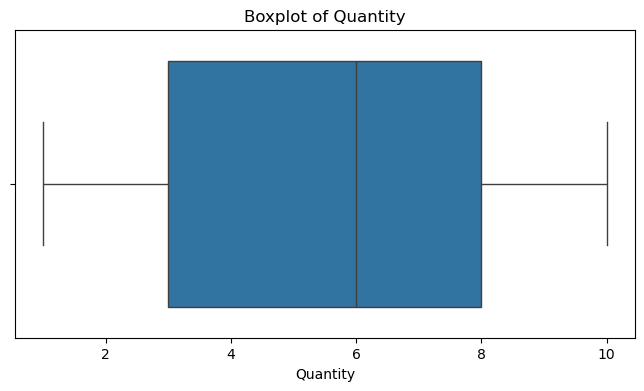

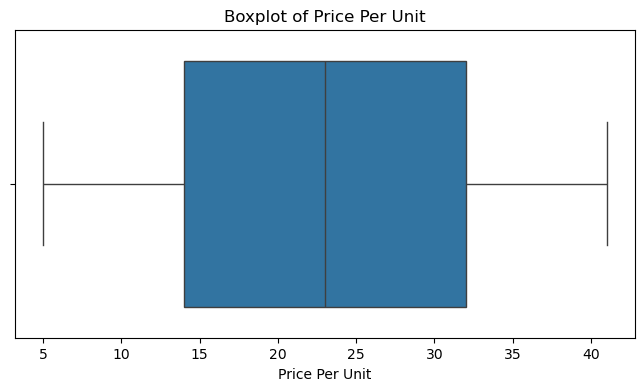

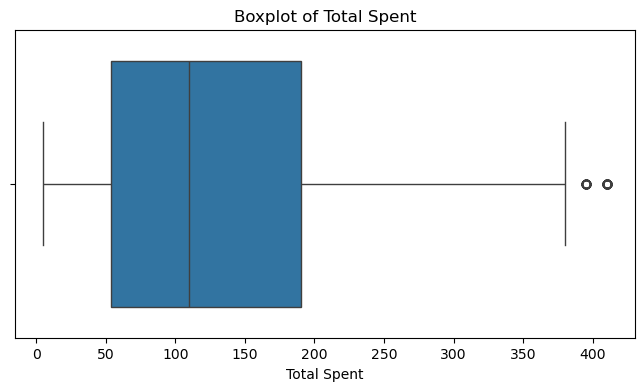

In [114]:
from  datasist.structdata import detect_outliers
numerical_cols = ['Quantity', 'Price Per Unit', 'Total Spent']
# Create boxplots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

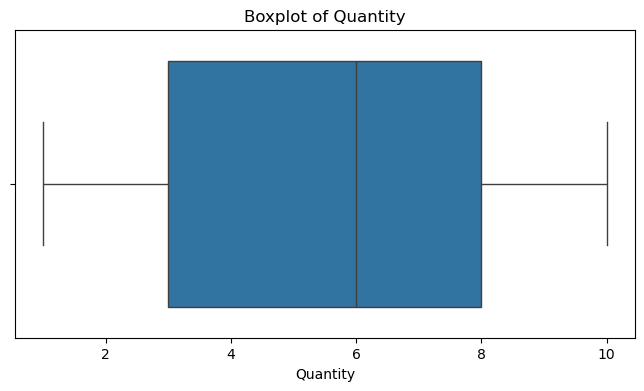

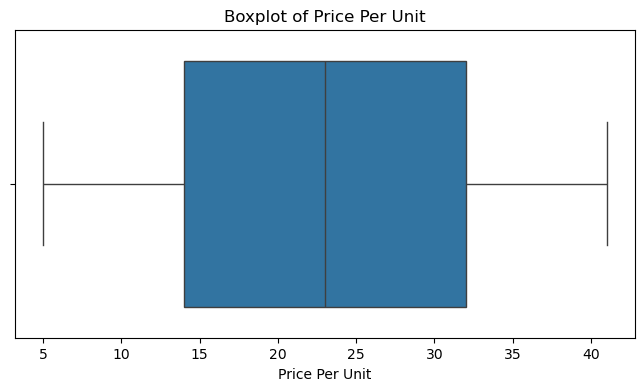

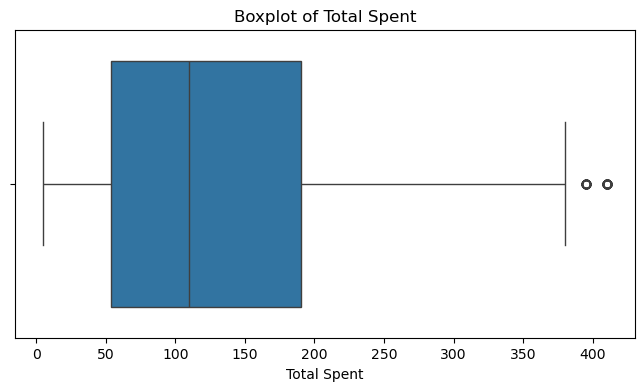

In [115]:
# Create boxplots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [116]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detect outliers in each numerical column
outliers = {}
for col in numerical_cols:
    outliers[col] = detect_outliers_iqr(df, col)
    print(f'Number of outliers in {col}: {outliers[col].shape[0]}')

Number of outliers in Quantity: 0
Number of outliers in Price Per Unit: 0
Number of outliers in Total Spent: 94


In [117]:
outliers

{'Quantity': Empty DataFrame
 Columns: [Transaction ID, Customer ID, Category, Item, Price Per Unit, Quantity, Total Spent, Payment Method, Location, Transaction Date, Discount Applied, Category_encoded, Item_encoded]
 Index: [],
 'Price Per Unit': Empty DataFrame
 Columns: [Transaction ID, Customer ID, Category, Item, Price Per Unit, Quantity, Total Spent, Payment Method, Location, Transaction Date, Discount Applied, Category_encoded, Item_encoded]
 Index: [],
 'Total Spent':       Transaction ID Customer ID                       Category          Item  \
 27       TXN_1599706     CUST_14                      Furniture   Item_25_FUR   
 129      TXN_1112365     CUST_19                           Food  Item_24_FOOD   
 133      TXN_2953434     CUST_25                      Furniture   Item_25_FUR   
 135      TXN_1249742     CUST_05                  Milk Products  Item_24_MILK   
 146      TXN_2565828     CUST_21                           Food  Item_24_FOOD   
 ...              ...      

In [118]:
df

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Category_encoded,Item_encoded
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10,185.0,Digital Wallet,Online,2024-04-08,1,0,0
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9,261.0,Digital Wallet,Online,2023-07-23,1,1,1
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2,43.0,Credit Card,Online,2022-10-05,0,2,2
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9,247.5,Credit Card,Online,2022-05-07,1,3,3
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7,87.5,Digital Wallet,Online,2022-10-02,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4,152.0,Credit Card,In-Store,2023-09-03,1,0,166
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9,58.5,Cash,Online,2022-08-12,0,3,14
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10,140.0,Cash,Online,2024-08-24,1,2,112
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6,84.0,Cash,Online,2023-12-30,1,5,44


In [119]:
# Ensure dates are parsed
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Add time components
df['Day'] = df['Transaction Date'].dt.day_name()
df['Week'] = df['Transaction Date'].dt.isocalendar().week
df['Month'] = df['Transaction Date'].dt.month_name()
df['Year'] = df['Transaction Date'].dt.year

In [120]:
df

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Category_encoded,Item_encoded,Day,Week,Month,Year
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10,185.0,Digital Wallet,Online,2024-04-08,1,0,0,Monday,15,April,2024
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9,261.0,Digital Wallet,Online,2023-07-23,1,1,1,Sunday,29,July,2023
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2,43.0,Credit Card,Online,2022-10-05,0,2,2,Wednesday,40,October,2022
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9,247.5,Credit Card,Online,2022-05-07,1,3,3,Saturday,18,May,2022
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7,87.5,Digital Wallet,Online,2022-10-02,0,4,4,Sunday,39,October,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4,152.0,Credit Card,In-Store,2023-09-03,1,0,166,Sunday,35,September,2023
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9,58.5,Cash,Online,2022-08-12,0,3,14,Friday,32,August,2022
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10,140.0,Cash,Online,2024-08-24,1,2,112,Saturday,34,August,2024
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6,84.0,Cash,Online,2023-12-30,1,5,44,Saturday,52,December,2023


# Answering Questions


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    12575 non-null  object        
 1   Customer ID       12575 non-null  object        
 2   Category          12575 non-null  object        
 3   Item              12575 non-null  object        
 4   Price Per Unit    12575 non-null  float64       
 5   Quantity          12575 non-null  int32         
 6   Total Spent       12575 non-null  float64       
 7   Payment Method    12575 non-null  object        
 8   Location          12575 non-null  object        
 9   Transaction Date  12575 non-null  datetime64[ns]
 10  Discount Applied  12575 non-null  int32         
 11  Category_encoded  12575 non-null  int64         
 12  Item_encoded      12575 non-null  int64         
 13  Day               12575 non-null  object        
 14  Week              1257

### 1) What are the top 5 most sold items?

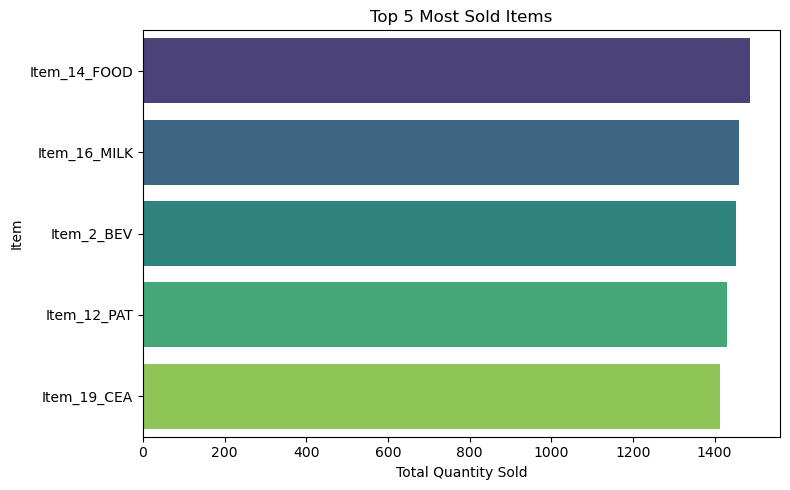

In [122]:
top_items = df.groupby('Item')['Quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=top_items.values, y=top_items.index, palette='viridis', hue=top_items.index, dodge=False, legend=False)
plt.title("Top 5 Most Sold Items")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Item")
plt.tight_layout()
plt.show()

### 2) Which payment methods are most used per location (In-store vs Online)?

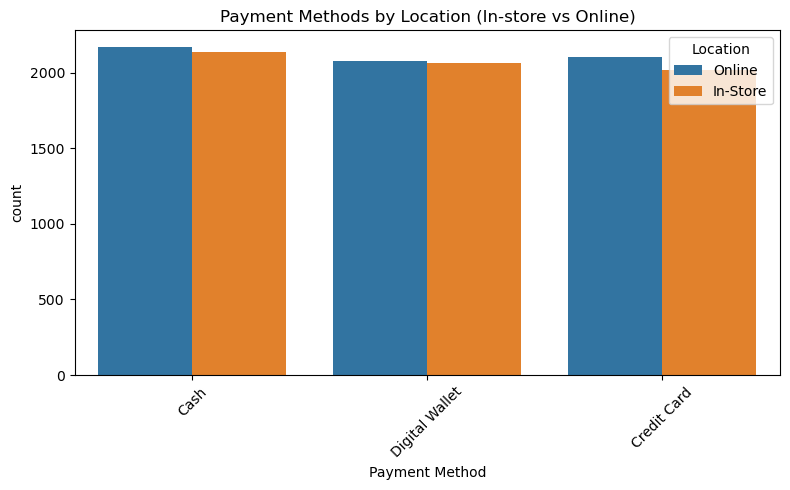

In [123]:
# Sort Payment Methods by count
payment_order = df['Payment Method'].value_counts().index

# Plot Payment Methods by Location (Sorted)
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Payment Method', hue='Location', order=payment_order)
plt.title("Payment Methods by Location (In-store vs Online)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3) What is the distribution of sales per day, week, and month?

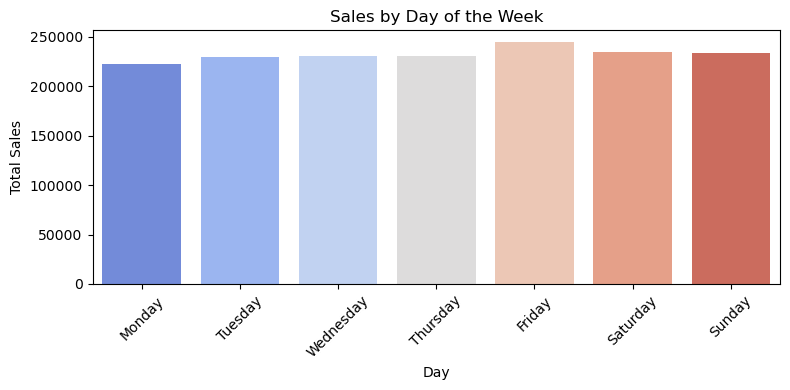

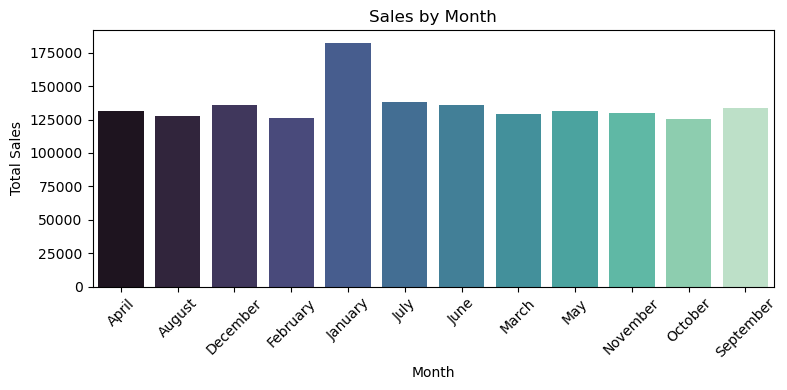

In [124]:
# 1. Sales by Day of the Week
df_day = df.groupby('Day')['Total Spent'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(8,4))
sns.barplot(x=df_day.index, y=df_day.values, palette='coolwarm', hue=df_day.index, dodge=False, legend=False)
plt.title("Sales by Day of the Week")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Sales by Month
df_month = df.groupby('Month')['Total Spent'].sum()

plt.figure(figsize=(8,4))
sns.barplot(x=df_month.index, y=df_month.values, palette='mako', hue=df_month.index, dodge=False, legend=False)
plt.title("Sales by Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4) Which customers are the most valuable (highest total spending)?

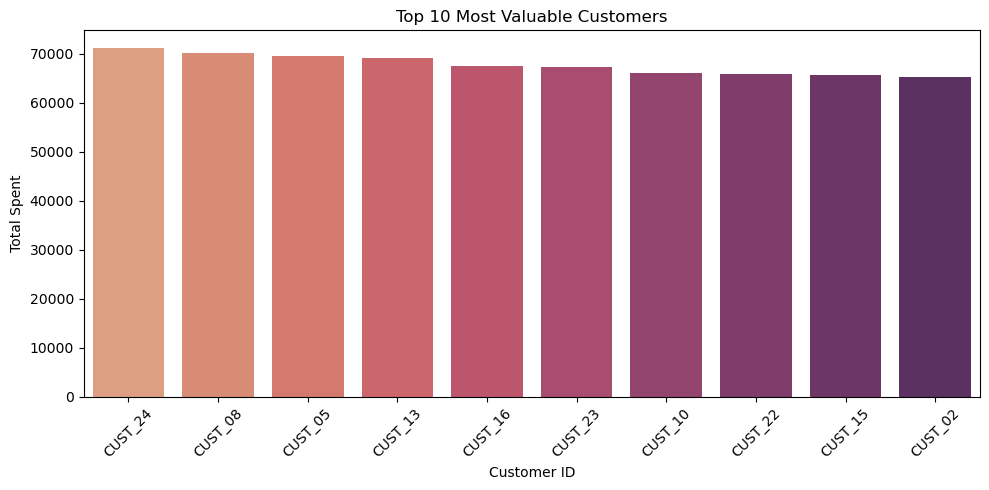

In [125]:
top_customers = df.groupby('Customer ID')['Total Spent'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.index, y=top_customers.values, hue=top_customers.index, palette='flare', dodge=False)
plt.title("Top 10 Most Valuable Customers")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5) Are there any trends in discount usage over time or across categories?

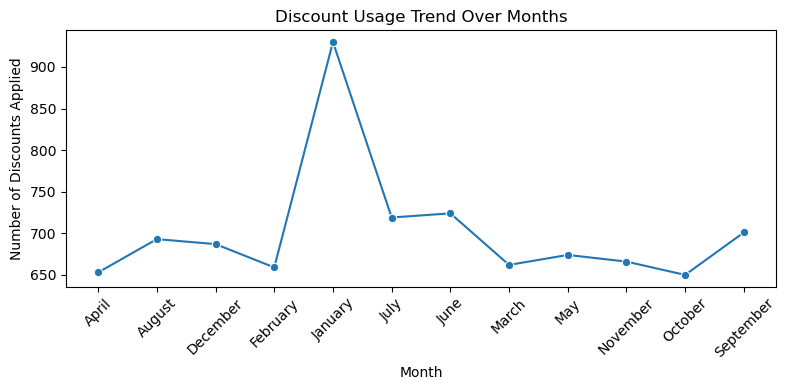

In [126]:
discounts_by_month = df[df['Discount Applied'] > 0].groupby('Month').size()

plt.figure(figsize=(8,4))
sns.lineplot(x=discounts_by_month.index, y=discounts_by_month.values, marker='o')
plt.title("Discount Usage Trend Over Months")
plt.ylabel("Number of Discounts Applied")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6) What is the average transaction value per category?

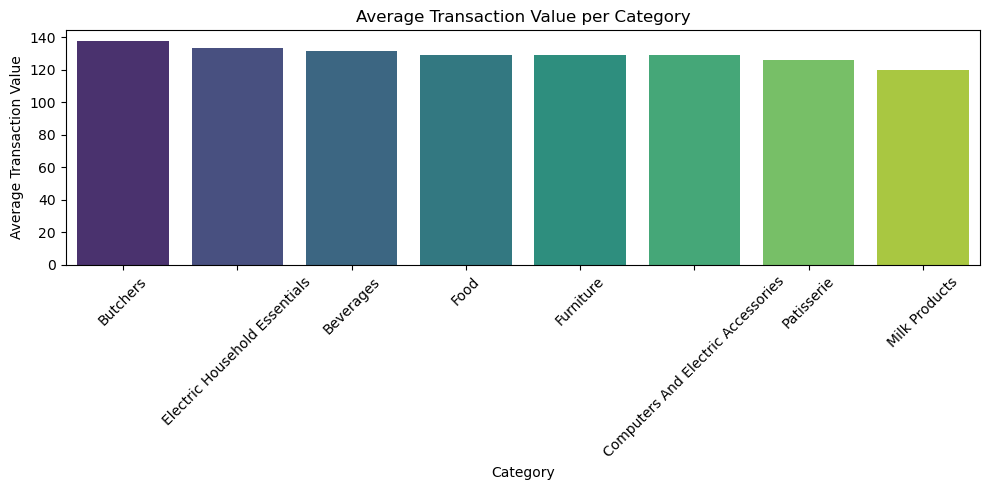

In [127]:
avg_transaction_per_category = df.groupby('Category')['Total Spent'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_transaction_per_category.index, y=avg_transaction_per_category.values, palette='viridis', hue=avg_transaction_per_category.index, dodge=False)
plt.title("Average Transaction Value per Category")
plt.ylabel("Average Transaction Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 7) Which item categories are more popular in online vs. in-store transactions?

<Figure size 1000x600 with 0 Axes>

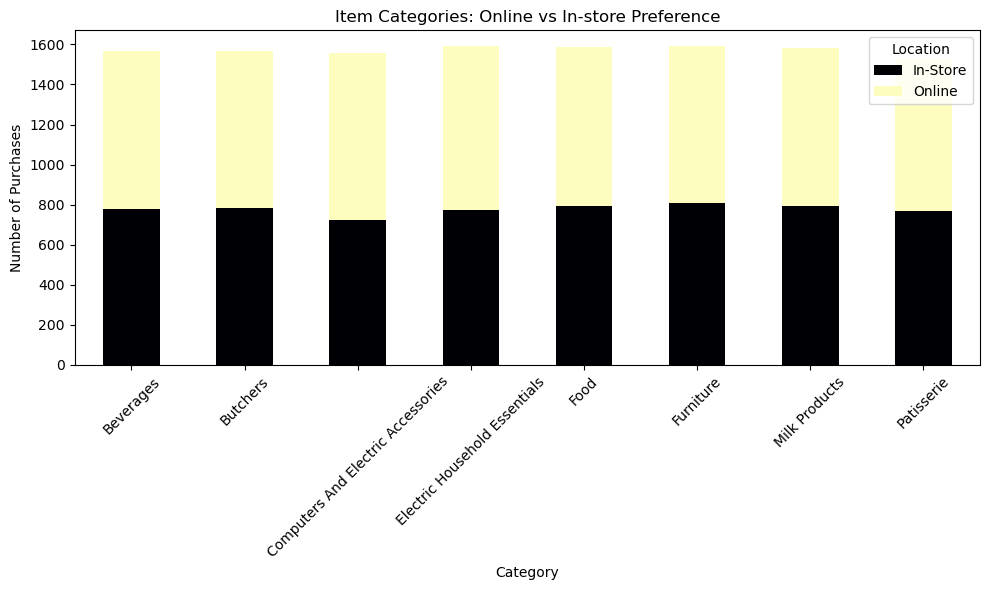

In [128]:
category_location = df.groupby(['Category', 'Location']).size().unstack()

plt.figure(figsize=(10,6))
category_location.plot(kind='bar', stacked=True, colormap='magma', figsize=(10,6))
plt.title("Item Categories: Online vs In-store Preference")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 8) Are discounts more likely to be applied on certain days (weekends, end of month, year)?

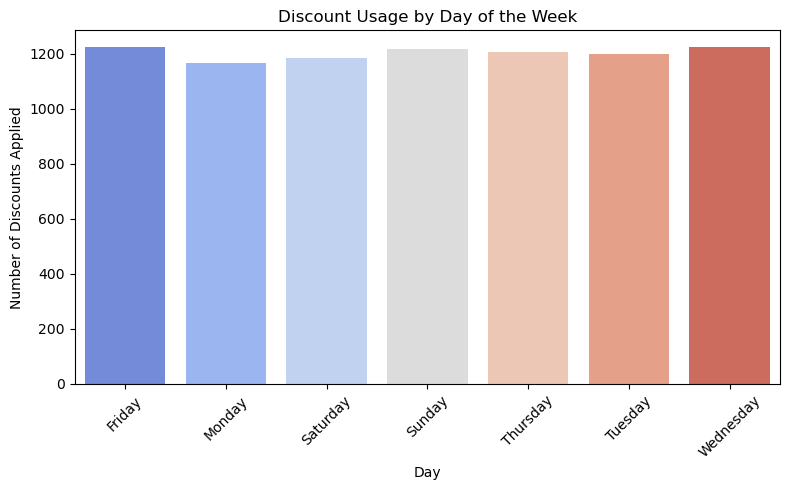

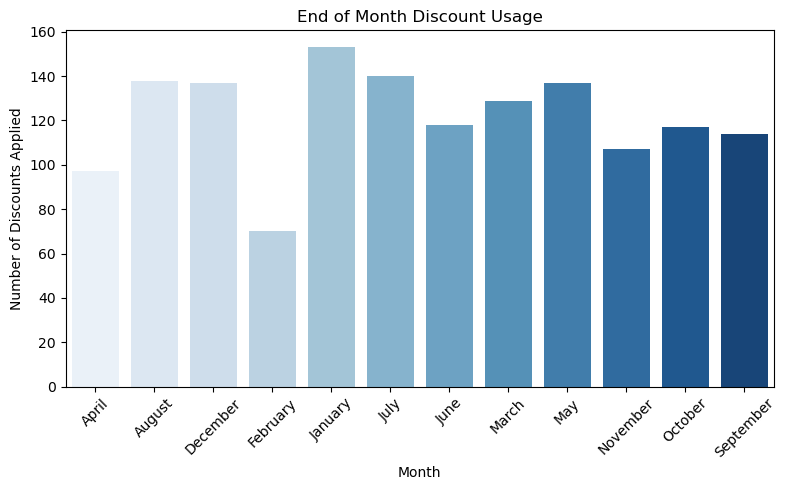

In [129]:
discounts_by_day = df[df['Discount Applied'] > 0].groupby('Day').size()

plt.figure(figsize=(8,5))
sns.barplot(x=discounts_by_day.index, y=discounts_by_day.values, palette='coolwarm', hue=discounts_by_day.index)
plt.title("Discount Usage by Day of the Week")
plt.ylabel("Number of Discounts Applied")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df['Day of Month'] = df['Transaction Date'].dt.day
df_end_of_month = df[(df['Day of Month'] > 25) & (df['Discount Applied'] > 0)].groupby('Month').size()

plt.figure(figsize=(8,5))
sns.barplot(x=df_end_of_month.index, y=df_end_of_month.values, palette='Blues', hue=df_end_of_month.index)
plt.title("End of Month Discount Usage")
plt.ylabel("Number of Discounts Applied")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 9) Do some customers always shop online while others prefer in-store?

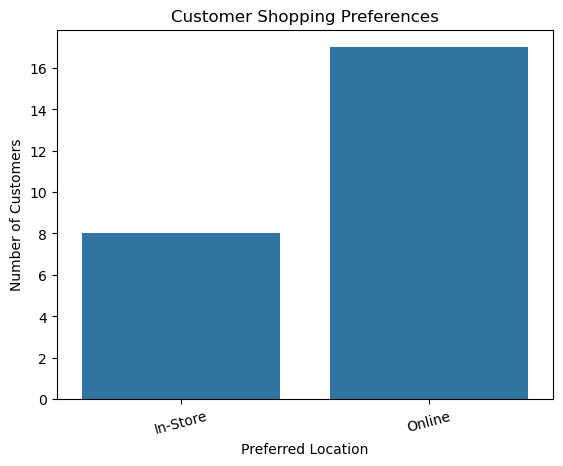

In [130]:
def get_mode_or_none(x):
    modes = x.mode()
    return modes[0] if len(modes) == 1 else 'Mixed'

customer_location_preference = df.groupby('Customer ID')['Location'].agg(get_mode_or_none)

# Count customer types
online_shoppers = (customer_location_preference == 'Online').sum()
instore_shoppers = (customer_location_preference == 'In-store').sum()
mixed_shoppers = (customer_location_preference == 'Mixed').sum()

labels = ['Online Shoppers', 'In-store Shoppers', 'Mixed Preference']
sizes = [online_shoppers, instore_shoppers, mixed_shoppers]

sns.countplot(x=customer_location_preference)
plt.title("Customer Shopping Preferences")
plt.xlabel("Preferred Location")
plt.ylabel("Number of Customers")
plt.xticks(rotation=15)
plt.show()

### 10) What are the top 5 profit-gaining items?

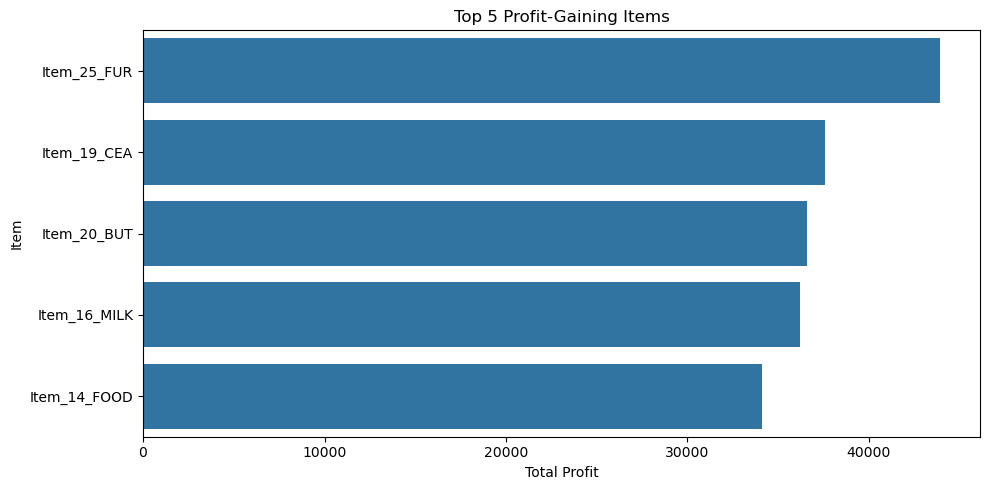

In [131]:
df['Profit'] = df['Total Spent'] - df['Discount Applied']

profit_by_item = df.groupby('Item')['Profit'].sum().sort_values(ascending=False)

# Get the top 5 profit-gaining items
top_5_profit_items = profit_by_item.head(5)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_profit_items.values, y=top_5_profit_items.index)
plt.title("Top 5 Profit-Gaining Items")
plt.xlabel("Total Profit")
plt.ylabel("Item")
plt.tight_layout()
plt.show()

### 11) What time of year sees the highest number of transactions or revenue?

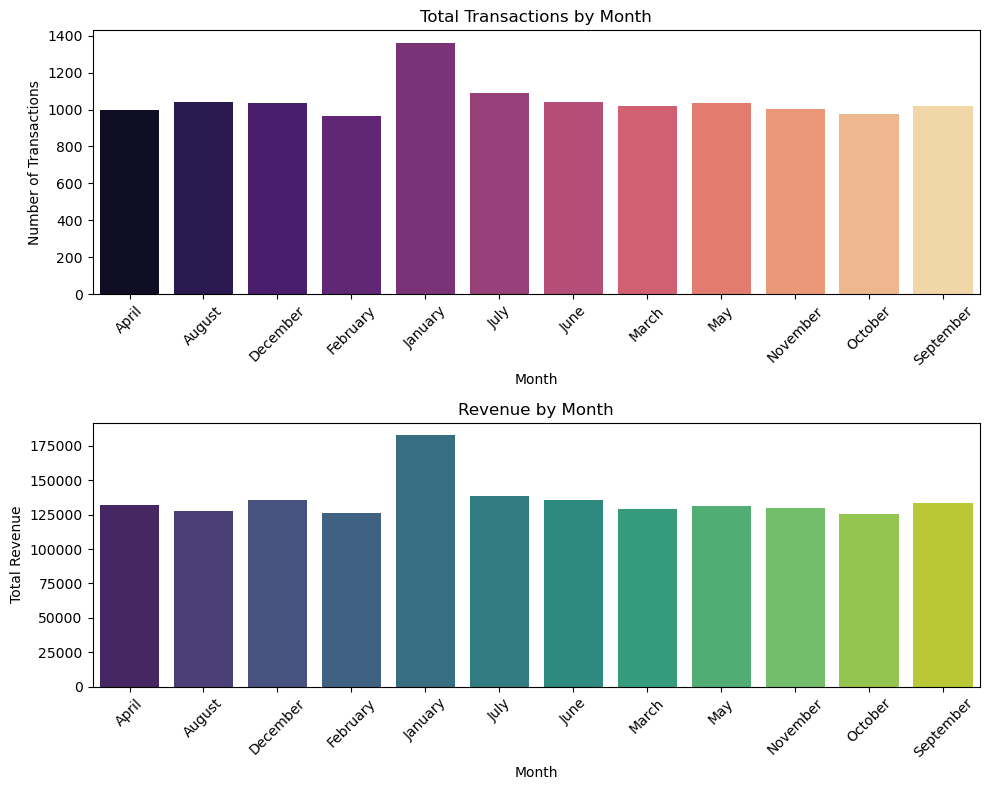

In [132]:
transactions_by_month = df.groupby('Month').size()
revenue_by_month = df.groupby('Month')['Total Spent'].sum()

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

sns.barplot(x=transactions_by_month.index, y=transactions_by_month.values, palette='magma', hue=transactions_by_month.index, ax=ax[0])
ax[0].set_title("Total Transactions by Month")
ax[0].set_ylabel("Number of Transactions")
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(x=revenue_by_month.index, y=revenue_by_month.values, palette='viridis', hue=revenue_by_month.index, ax=ax[1])
ax[1].set_title("Revenue by Month")
ax[1].set_ylabel("Total Revenue")
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 12) Which categories are not purchased well (have low sales)?

Category
Furniture                             8857
Food                                  8845
Beverages                             8750
Milk Products                         8723
Electric Household Essentials         8707
Computers And Electric Accessories    8687
Butchers                              8564
Patisserie                            8401
Name: Quantity, dtype: int32


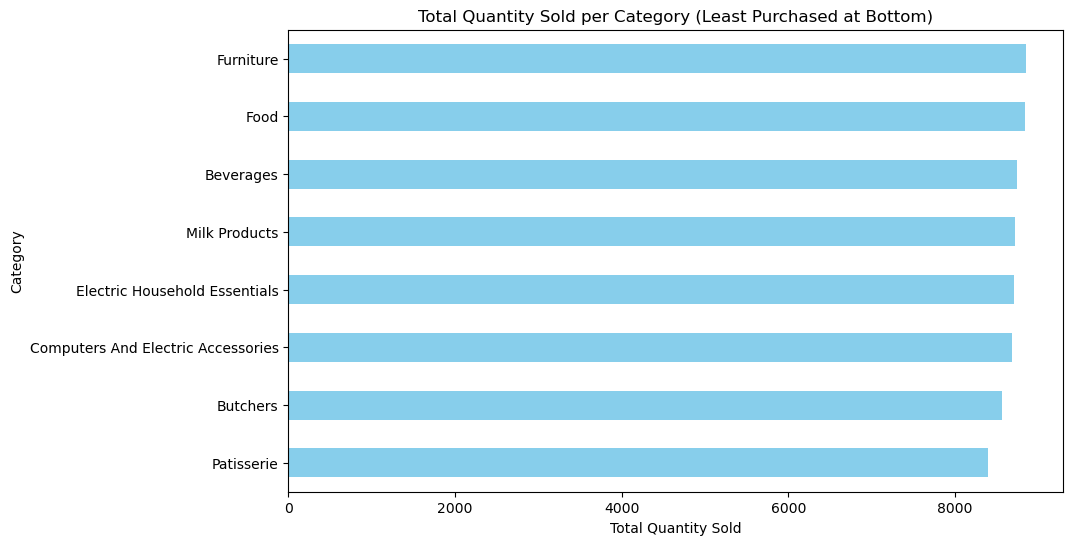

In [133]:
category_sales = df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

print(category_sales)
plt.figure(figsize=(10,6))
category_sales.plot(kind='barh', color='skyblue')
plt.title('Total Quantity Sold per Category (Least Purchased at Bottom)')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Category')
plt.gca().invert_yaxis()
plt.show()

### 13) What are the bottom 5 least sold items?

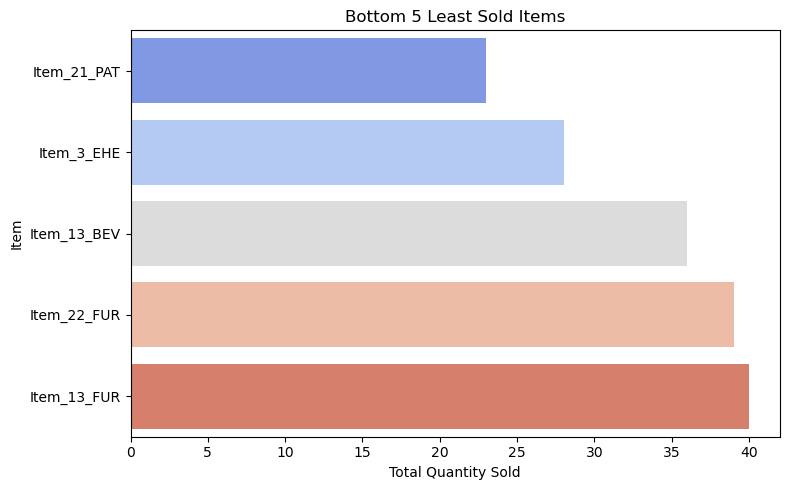

In [134]:
bottom_items = df.groupby('Item')['Quantity'].sum().sort_values(ascending=True).head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=bottom_items.values, y=bottom_items.index, palette='coolwarm', hue=bottom_items.index)
plt.title("Bottom 5 Least Sold Items")
plt.xlabel("Total Quantity Sold")
plt.tight_layout()
plt.show()

### 14) Are there product categories that are commonly bought together?

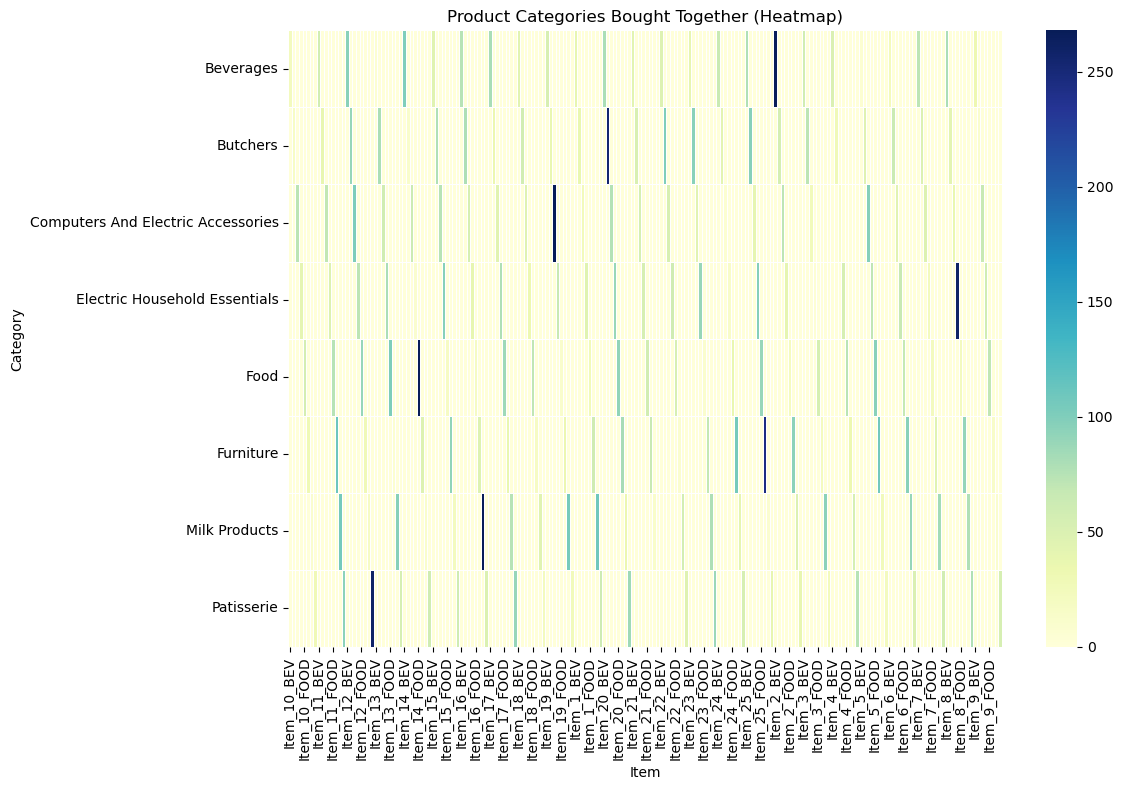

In [135]:
# We can calculate this using market basket analysis, but let’s simplify it with a heatmap.
# Pivot table of Category and Item counts for co-purchases
category_item_matrix = pd.crosstab(df['Category'], df['Item'])

# Plot a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(category_item_matrix, cmap='YlGnBu', linewidths=0.5)
plt.title("Product Categories Bought Together (Heatmap)")
plt.xlabel("Item")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


### 15) Which customers have the highest total spending and how frequently do they shop?

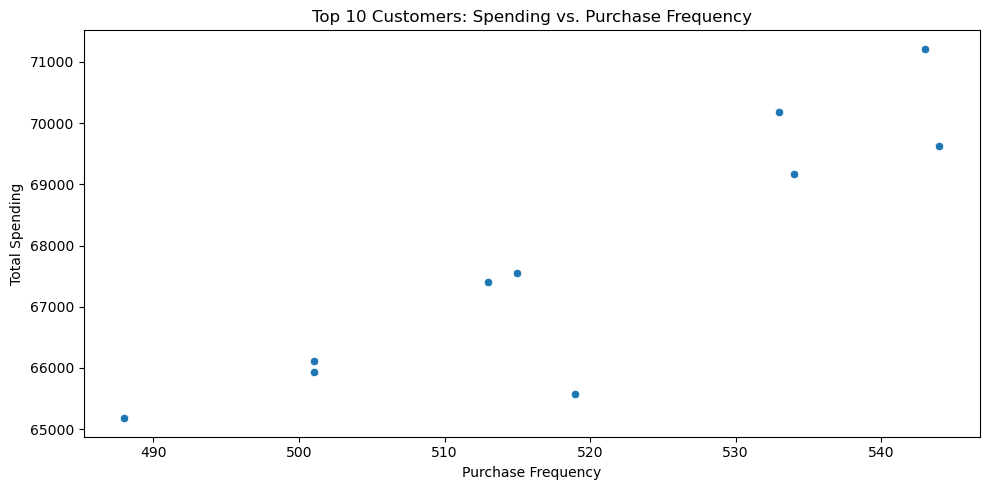

In [136]:
# Calculate total spending and transaction frequency per customer
customer_spending = df.groupby('Customer ID').agg(
    total_spending=('Total Spent', 'sum'),
    purchase_frequency=('Transaction ID', 'nunique')
).sort_values('total_spending', ascending=False)

# Plotting
plt.figure(figsize=(10,5))
sns.scatterplot(data=customer_spending.head(10), x='purchase_frequency', y='total_spending', marker='o')
plt.title("Top 10 Customers: Spending vs. Purchase Frequency")
plt.xlabel("Purchase Frequency")
plt.ylabel("Total Spending")
plt.tight_layout()
plt.show()

### 16) What is the ratio of new customers to returning customers?

Customer Ratio:
Customer_Type
Returning    0.997694
New          0.002306
Name: count, dtype: float64


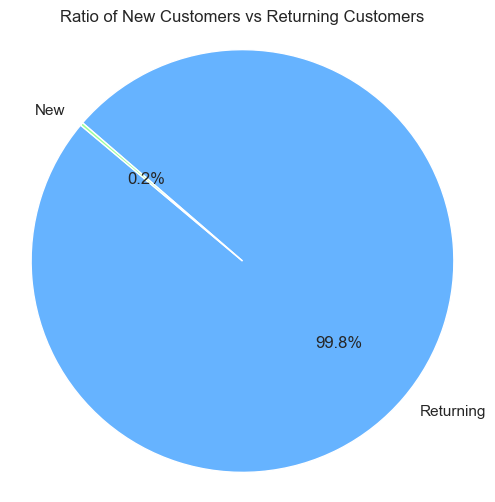

In [137]:
sns.set(style="whitegrid")
 
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
 
first_purchase = df.groupby('Customer ID')['Transaction Date'].min().reset_index()

first_purchase.columns = ['Customer ID', 'First_Purchase_Date']
 
df = df.merge(first_purchase, on='Customer ID')
 
df['Customer_Type'] = df.apply(lambda x: 'New' if x['Transaction Date'] == x['First_Purchase_Date'] else 'Returning', axis=1)
 
customer_counts = df['Customer_Type'].value_counts()

customer_ratio = customer_counts / customer_counts.sum()
 
print("Customer Ratio:")

print(customer_ratio)
 
plt.figure(figsize=(6,6))

colors = ['#66b3ff','#99ff99']

plt.pie(customer_counts, labels=customer_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)

plt.title('Ratio of New Customers vs Returning Customers')

plt.axis('equal')

plt.show()


In [138]:
df.to_csv('cleaned_retail_store_sales.csv', index=False)